### Tree B or Tree 7 (In Thesis) Analysis.

imports the relevant functions used in processing and making the plots

In [1]:
from functions import *  # imports all the functions from module function.py

##### #1: Read the Particular Tree Directory and create relevant arrays

In [2]:
coord_array, amp_array, depth_z = create_cartes_init(tree_folder = 'data/Tree7_8x7_migrated/',
                                                     stored_rad='05400', start_radius = 54)

In [3]:
coord_array.shape, amp_array.shape, depth_z.shape 

((171, 4), (411, 171), (411,))

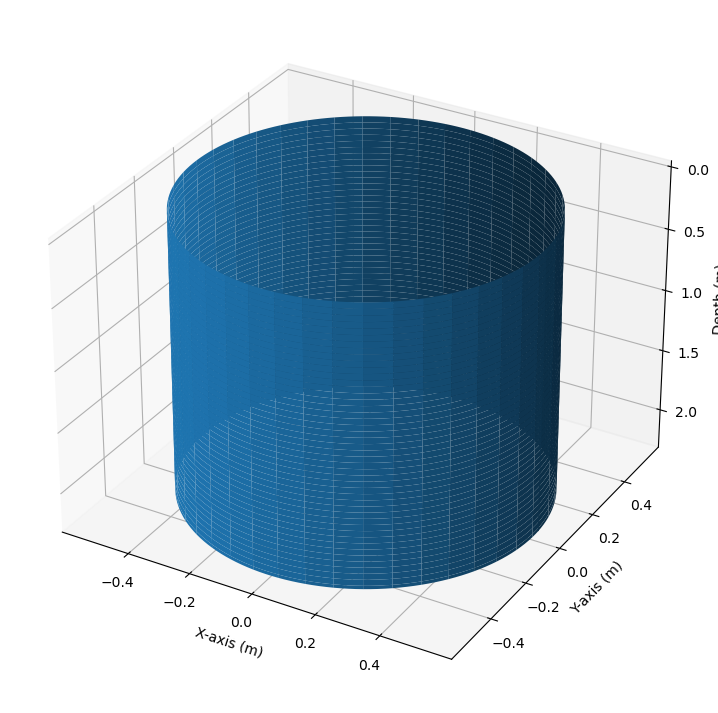

In [4]:
plot_init_transect(coord_array, depth=depth_z)

##### #2: Update the coord_array and amp_array with the remaining transects

In [5]:
coord_array, amp_array = create_cartes_arr(coord_array, amp_array, 
                                           tree_folder = 'data/Tree7_8x7_migrated', start_radius = 64)

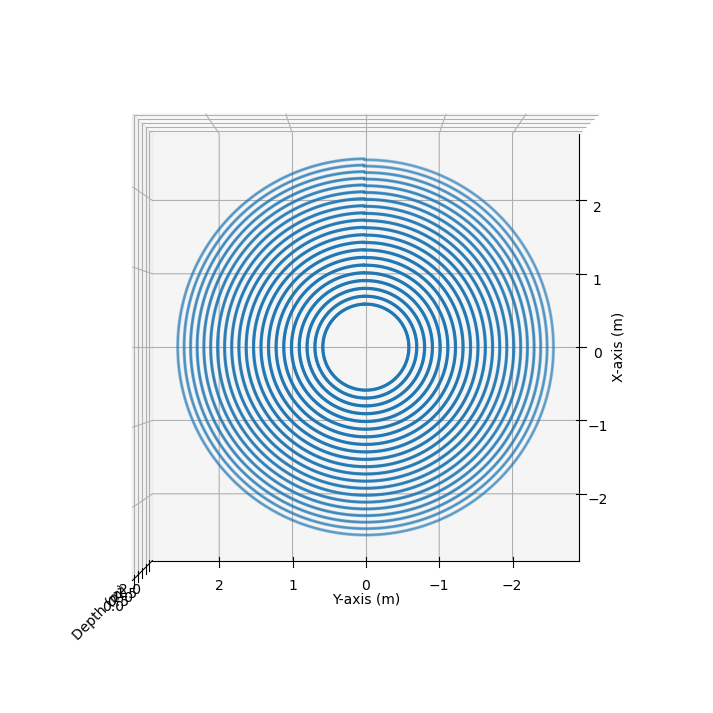

In [6]:
plot_cartes_coord(coord_array, depth=depth_z, top_view=True)

In [7]:
list_dir = os.listdir('data/Tree7_8x7_migrated')  # a list of the tree's transects
list_dir = sorted(list_dir)  # Added sorted to the list
list_dir

['Migrated_05400.ASC',
 'Migrated_06400.ASC',
 'Migrated_07400.ASC',
 'Migrated_08400.ASC',
 'Migrated_09400.ASC',
 'Migrated_10400.ASC',
 'Migrated_11400.ASC',
 'Migrated_12400.ASC',
 'Migrated_13400.ASC',
 'Migrated_14400.ASC',
 'Migrated_15400.ASC',
 'Migrated_16400.ASC',
 'Migrated_17400.ASC',
 'Migrated_18400.ASC',
 'Migrated_19400.ASC',
 'Migrated_20400.ASC',
 'Migrated_21400.ASC',
 'Migrated_22400.ASC',
 'Migrated_23400.ASC',
 'Migrated_24400.ASC',
 'Migrated_25400.ASC']

##### #3: Create Mesh For the Amplitude

In [8]:
x_arrT7, y_arrT7, z_arrT7, c_arrT7 = create_mesh(coord_array, 
                                                 amp_array, depth_z)

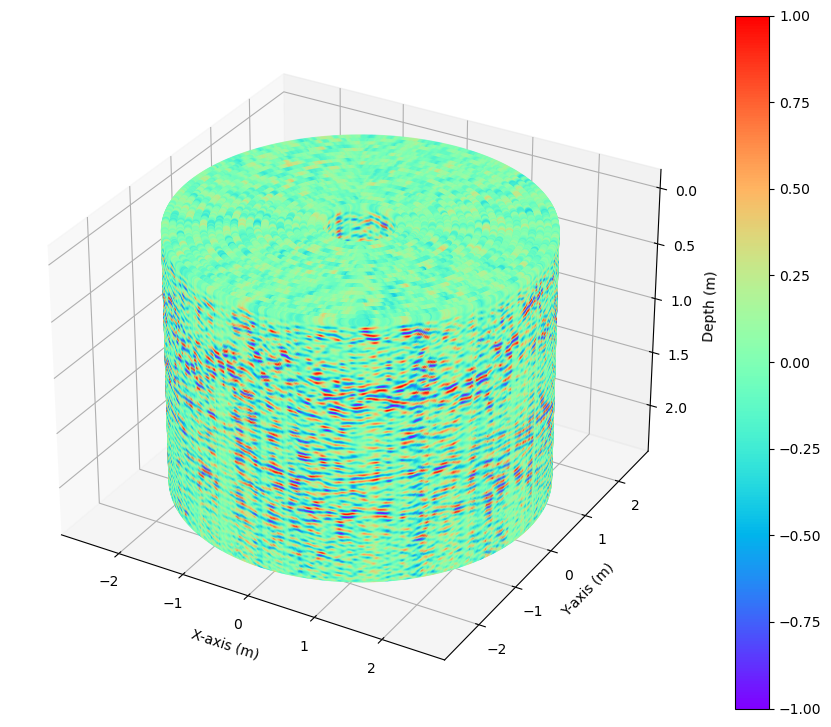

In [9]:
matplot_amplitude(x_arrT7, y_arrT7, z_arrT7, c_arrT7, top_view=False)

##### #4: Plotting Depth Slices

#### The `depth_slice` function makest the plot for any depth entered in meters using plotly interactive plots and output the values plotted which is then used for the interpolation of the points.

Interactive plot using Plotly

In [10]:
DS_25cm = depth_slice(x_arrT7, y_arrT7, z_arrT7, c_arrT7, depth=0.25)

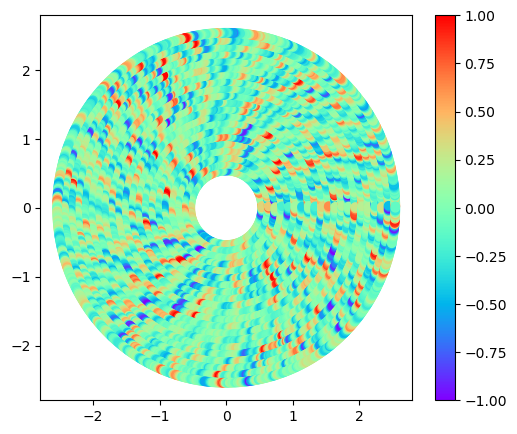

In [11]:
cmap = plt.cm.rainbow
plt.figure(figsize=(6, 5))
plt.scatter(DS_25cm[0], DS_25cm[1], c=DS_25cm[3], cmap=cmap)
plt.colorbar()

`The arrays were non-stationary` and there was no need for downscaling the amplitude. Hence, the exact amplitudes were used for the analysis.

##### #5: Interpolating the amplitude for better visualization of the roots.

A High computing clusters were used to compute the following as a result of the interpolation of millions of points that were interpolated.

It took six minutes to run on an `HPCC of 10 Cores and 500 GB memory`

In [12]:
_5cm ,_10cm, _15cm, _20cm, _25cm, _30cm, _35cm, _40cm, _45cm =return_arr_depth_5_45cm(
    x_arrT7, y_arrT7, z_arrT7, c_arrT7)

In [13]:
num_grid_value = 300
grid_ext_val = 3
int_mesh_5cm, ampl_5cm = interpolator(_5cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_10cm, ampl_10cm = interpolator(_10cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_15cm, ampl_15cm = interpolator(_15cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_20cm, ampl_20cm = interpolator(_20cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_25cm, ampl_25cm = interpolator(_25cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_30cm, ampl_30cm= interpolator(_30cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_35cm, ampl_35cm = interpolator(_35cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_40cm, ampl_40cm = interpolator(_40cm, num_grid= num_grid_value, grid_ext= grid_ext_val)
int_mesh_45cm, ampl_45cm = interpolator(_45cm, num_grid= num_grid_value, grid_ext= grid_ext_val)

##### #6: Plotting the depth slices for the interpolated Amplitude using the `RBF Interpolation` library

In [14]:
# A list that adds include all the amplitude
amplitude_list = [ampl_5cm, ampl_10cm, ampl_15cm, ampl_20cm, ampl_25cm, ampl_30cm, 
                  ampl_35cm, ampl_40cm, ampl_45cm]

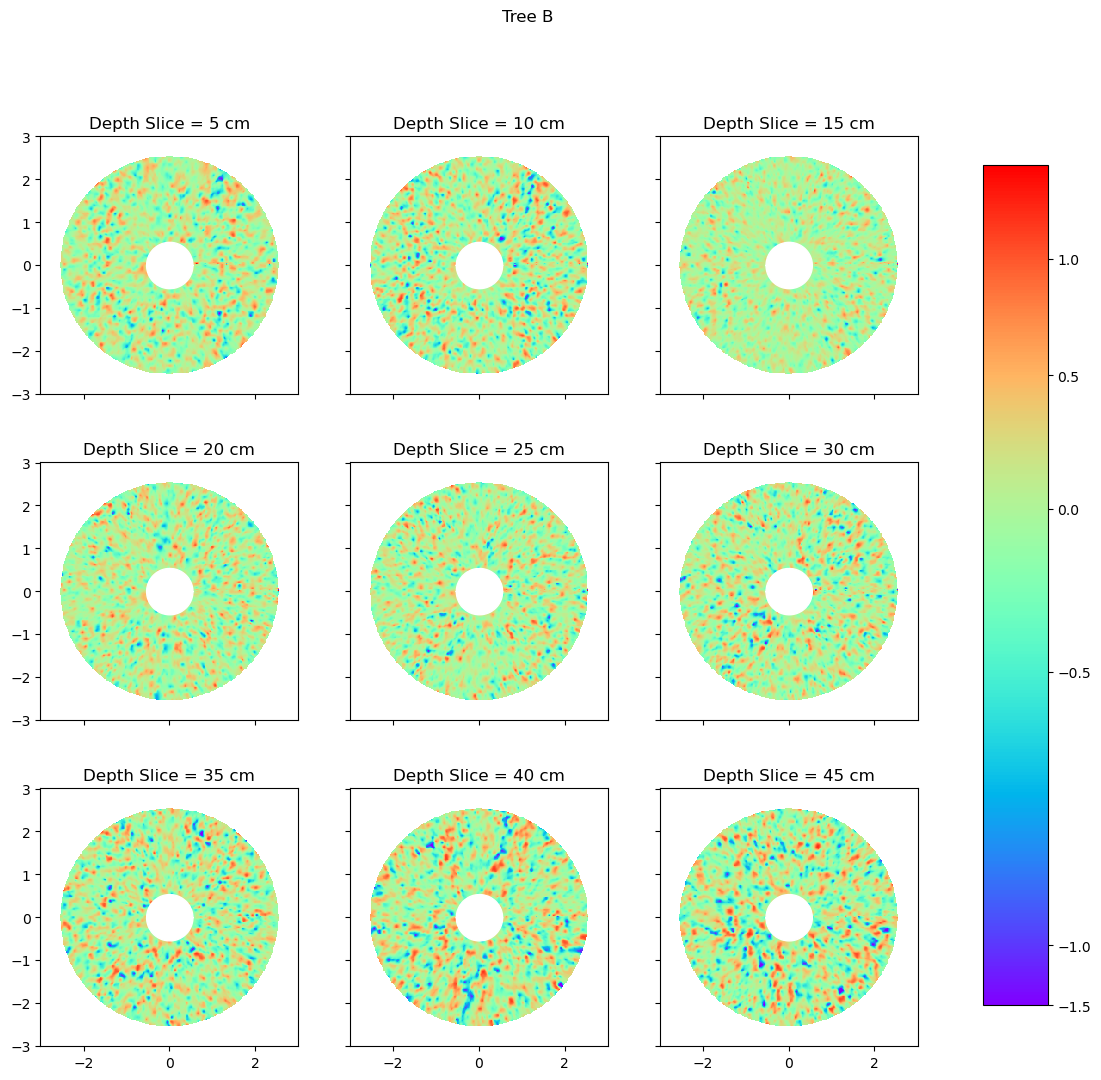

In [15]:
multiplot_interpolated(int_mesh_5cm, amplitude_list, norm_val = .6, 
                       inner_rad=0.54, outer_rad=2.54, title = 'Tree B')
    